<a href="https://colab.research.google.com/github/belanatal/PosPUCRio/blob/main/MVP-SprintI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUC Rio: Pós Graduação em Ciência de Dados e Analytics**

**MVP Sprint I: Análise de Dados e Boas Práticas (40530010055_20230_01)**

Aluna: Isabela Fernanda Natal Batista Abreu Gomes

Maio/2023

# Programa para obtenção do histórico de Energia Natural Afluentel (ENA), da Energia Armazenada (EArm), da Demanda/Carga e do Custo Marginal da Operação (CMO) por subsistema, a partir da área de Dados Abertos do Operador Nacional do Sistema Elétrico (ONS): [Arquitetura Aberta](https://dados.ons.org.br/)


> No Brasil, a projeção de preços da energia elétrica baseia-se na previsão, centralizada, de despacho das usinas pelo Operador Nacional do Sistema Elétrico (ONS). 

> Em linhas gerais, o preço da energia, também chamado de Preço de Liquidação das Diferenças (PLD) tem como base o Custo Marginal da Operação (CMO), dado pelo planejamento da operação hidrotérmica do Sistema Interligado Nacional. Os modelos utilizados para projeção oficial do despacho das usinas pelo ONS (Operador Nacional do Sistema) denominam-se NEWAVE, DECOMP e DESSEM, todos desenvolvidos e fornecidos pelo Centro de Pesquisas da Eletrobras (CEPEL), conforme ilustrado na Figura 1.

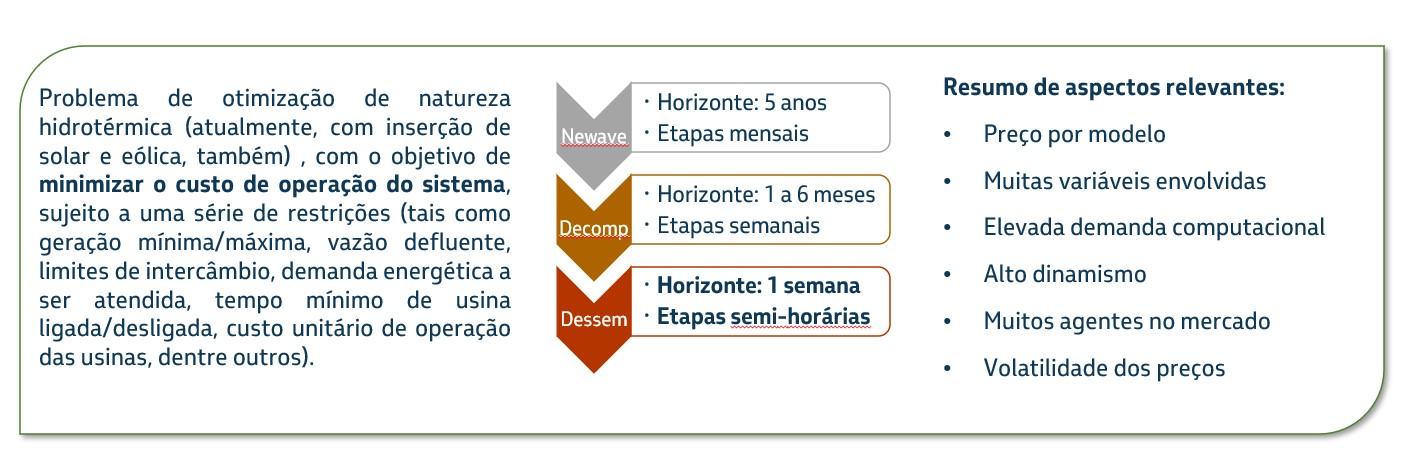

Figura 1 - Resumo do problema de planejamento eletroenergético brasileiro.

> Para a projeção do preço da energia elétrica, uma série de grandezas são utilizadas como entrada. Uma vez que a matriz eletroenergética brasileira é predominantemente hidráulica (e os modelos consideram este aspecto no equacionamento do problema de otimização), a diferença entre as vazões previstas e verificadas dos postos associados às usinas hidroelétricas responde por cerca de 50% das variações no PLD/CMO, conforme ilustrado na Figura 2, disponibilizada pela Câmara de Comercialização de Energia (CCEE). A Energia Armazenada e a Carga também desempenham papel relevante na influência do PLD/CMO. Juntas, as três grandezas respondem por mais de 70% das variações no custo marginal da operação sendo, portanto, as variáveis de interesse na primeira abordagem deste MVP.

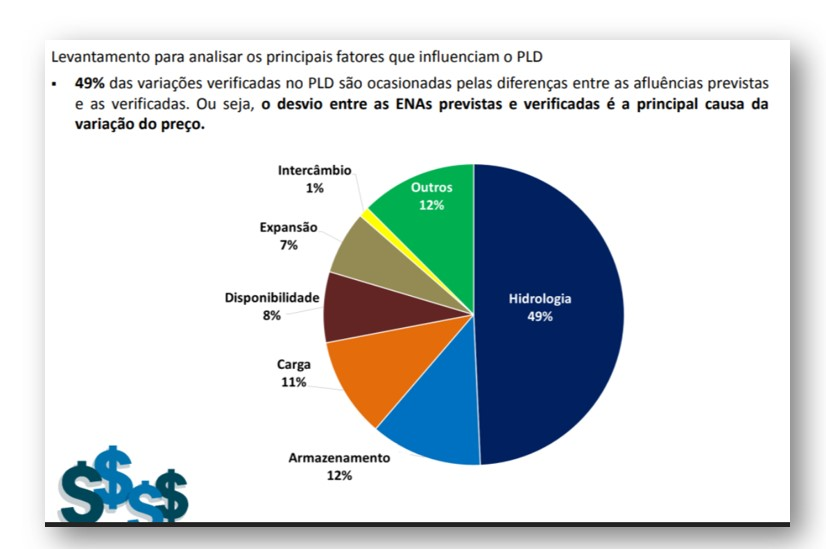

Figura 2 - Variação do PLD/CMO por variável de entrada nos modelos de planejamento eletroenergético do SIN. Fonte: CCEE


> Neste contexto, considerando a atuação na área de Inteligência de Mercado de Gás e Energia em um dos principais agentes geradores do Brasil, faz sentido estruturarmos a coleta e tratamento dos dados referentes às grandezas mencionadas, visando à melhor tomada de decisão sob a ótica da operação do parque e da comercialização e logística do gás e da energia elétrica.





**Seção I: Obtenção dos Dados**


1.   [Energia Natural Afluente (ENA) por Subsistema](https://dados.ons.org.br/dataset/ena-diario-por-subsistema)
2.   [Energia Armazenada (EArm) por Subsistema](https://dados.ons.org.br/dataset/ear-diario-por-subsistema)
3.   [Demanda por Subsistema](https://dados.ons.org.br/dataset/carga-energia)
4.   [Custo Marginal da Operação (CMO) Semanal por Subsistema](https://dados.ons.org.br/dataset/cmo-semanal)



Inicialmente, iremos importar e avaliar (utilizando a biblioteca Pandas, para fazer uma rápida análise exploratória) os dataset de "entrada", variáveis explicativas para a obtenção do CMO: ENA, EArm e Demanda, nesta ordem.

In [33]:
# Seção I.1: Programa para obtenção das Energias Naturais Afluentes - Dados Abertos Operador Nacional do Sistema Elétrico
# Dados por subsistema do Sistema Interligado Nacional, atualizados diariamente.

# Importando as bibliotecas pandas, matplotlib (pyplot) e datetime
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# ENA - Arquivos com os dados anuais, com histórico desde 2001
ano_zero=2001
ano_inicio=ano_zero+1
data_fim=datetime.datetime.now() - datetime.timedelta(days=5) #ano vigente, considerando um possível atraso de até 5 dias na publicação, o que é comum na virada de ano
ano_fim=data_fim.strftime("%Y")
ano_fim=int(ano_fim)
print(data_fim)
print(ano_fim)

2023-04-24 17:34:30.924192
2023


In [34]:
#Importando os dados da url para o dataframe, começando pelo ano inicial do histórico, até o ano vigente
#Conforme dicionário de dados disponibilizado na página de Arquitetura Aberta do ONS, os arquivos .csv estão no formato UTF-8, com delimitador do tipo ponto-e-vírgula
ena=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ena_subsistema_di/ENA_DIARIO_SUBSISTEMA_"+str(ano_zero)+".csv",delimiter=";",encoding = 'utf8')
ena=pd.DataFrame(ena)
for ano in range (ano_inicio,ano_fim+1):
    ano_str=str(ano)  
    ena_ano=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ena_subsistema_di/ENA_DIARIO_SUBSISTEMA_"+ano_str+".csv",delimiter=";",encoding = 'utf8')
    ena_ano=pd.DataFrame(ena_ano)
    ena=pd.concat([ena,ena_ano])
    
print(ena)

    id_subsistema nom_subsistema    ena_data  ena_bruta_regiao_mwmed  \
0               N          NORTE  2001-01-01            10154.000000   
1              NE       NORDESTE  2001-01-01            13472.000000   
2               S            SUL  2001-01-01             7703.000000   
3              SE        SUDESTE  2001-01-01            39186.000000   
4               N          NORTE  2001-01-02             9590.000000   
..            ...            ...         ...                     ...   
463            SE        SUDESTE  2023-04-26            56174.171875   
464             N          NORTE  2023-04-27            25151.410156   
465            NE       NORDESTE  2023-04-27             4278.628906   
466             S            SUL  2023-04-27             6723.659180   
467            SE        SUDESTE  2023-04-27            54874.093750   

     ena_bruta_regiao_percentualmlt  ena_armazenavel_regiao_mwmed  \
0                        122.339996                   9033.000000 

In [35]:
# Conferindo as primeiras 10 linhas, para check da importação de dados
ena.head(10)

,id_subsistema,nom_subsistema,ena_data,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt
0,N,NORTE,2001-01-01,10154.0,122.339996,9033.0,108.839996
1,NE,NORDESTE,2001-01-01,13472.0,101.480003,13385.0,100.830002
2,S,SUL,2001-01-01,7703.0,160.910004,7703.0,160.910004
3,SE,SUDESTE,2001-01-01,39186.0,86.980003,37611.0,83.489998
4,N,NORTE,2001-01-02,9590.0,115.550003,8091.0,97.489998
5,NE,NORDESTE,2001-01-02,13551.0,102.080002,13465.0,101.430000
6,S,SUL,2001-01-02,6730.0,140.580002,6730.0,140.580002
7,SE,SUDESTE,2001-01-02,41230.0,91.519997,40063.0,88.930000
8,N,NORTE,2001-01-03,9066.0,109.239998,7213.0,86.910004
9,NE,NORDESTE,2001-01-03,13551.0,102.080002,13461.0,101.400002


In [36]:
# Conferindo as últimas 10 linhas
ena.tail(10)

,id_subsistema,nom_subsistema,ena_data,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt
458,S,SUL,2023-04-25,7189.113770,110.516197,4930.372070,75.793198
459,SE,SUDESTE,2023-04-25,57019.953125,104.145599,40999.707031,74.885002
460,N,NORTE,2023-04-26,25496.867188,94.545502,16710.812500,61.965698
461,NE,NORDESTE,2023-04-26,4297.992188,37.400398,4280.832031,37.251099
462,S,SUL,2023-04-26,6931.170898,106.550903,4392.663086,67.527100
463,SE,SUDESTE,2023-04-26,56174.171875,102.600800,41993.105469,76.699402
464,N,NORTE,2023-04-27,25151.410156,93.264503,17859.107422,66.223701
465,NE,NORDESTE,2023-04-27,4278.628906,37.231899,4261.469238,37.082600
466,S,SUL,2023-04-27,6723.659180,103.360901,6354.798828,97.690498
467,SE,SUDESTE,2023-04-27,54874.093750,100.226196,41339.187500,75.504997


In [37]:
# Conferindo a quantidade de dias (considerando 4 subsistemas)
len(ena)/4

8152.0

In [38]:
# Verificando os tipos de coluna do dataframe ena
ena.dtypes

id_subsistema                            object
nom_subsistema                           object
ena_data                                 object
ena_bruta_regiao_mwmed                  float64
ena_bruta_regiao_percentualmlt          float64
ena_armazenavel_regiao_mwmed            float64
ena_armazenavel_regiao_percentualmlt    float64
dtype: object

In [39]:
# Iniciando o tratamento dos dados
#Convertendo os nomes dos subsistemas para 1ª letra em maiúscula: SE->Sudeste; S->Sul; NE->Nordeste; N->Norte
ena['nom_subsistema']=ena['nom_subsistema'].replace({'SUDESTE':'Sudeste',
                                                'SUL':'Sul',
                                                'NORDESTE':'Nordeste',
                                                'NORTE':'Norte'})

In [40]:
# Renomeando a coluna de data, de modo a ser o mesmo nome em todos os DataFrames, para facilitar a chave de mesclagem
ena=ena.rename(columns = {'ena_data':'Data'})
print(ena)

    id_subsistema nom_subsistema        Data  ena_bruta_regiao_mwmed  \
0               N          Norte  2001-01-01            10154.000000   
1              NE       Nordeste  2001-01-01            13472.000000   
2               S            Sul  2001-01-01             7703.000000   
3              SE        Sudeste  2001-01-01            39186.000000   
4               N          Norte  2001-01-02             9590.000000   
..            ...            ...         ...                     ...   
463            SE        Sudeste  2023-04-26            56174.171875   
464             N          Norte  2023-04-27            25151.410156   
465            NE       Nordeste  2023-04-27             4278.628906   
466             S            Sul  2023-04-27             6723.659180   
467            SE        Sudeste  2023-04-27            54874.093750   

     ena_bruta_regiao_percentualmlt  ena_armazenavel_regiao_mwmed  \
0                        122.339996                   9033.000000 

In [41]:
# Alterando o tipo da coluna "Data"
ena['Data'] = pd.to_datetime(ena['Data'])

In [42]:
# Verificando os tipos de coluna do dataframe ena
ena.dtypes

id_subsistema                                   object
nom_subsistema                                  object
Data                                    datetime64[ns]
ena_bruta_regiao_mwmed                         float64
ena_bruta_regiao_percentualmlt                 float64
ena_armazenavel_regiao_mwmed                   float64
ena_armazenavel_regiao_percentualmlt           float64
dtype: object

In [43]:
# Reordenando o dataframe ena, pela coluna Data (em ordem decrescente)
ena=ena.sort_values(by='Data', ascending=False)
ena.head(20)

,id_subsistema,nom_subsistema,Data,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt
467,SE,Sudeste,2023-04-27,54874.093750,100.226196,41339.187500,75.504997
466,S,Sul,2023-04-27,6723.659180,103.360901,6354.798828,97.690498
465,NE,Nordeste,2023-04-27,4278.628906,37.231899,4261.469238,37.082600
464,N,Norte,2023-04-27,25151.410156,93.264503,17859.107422,66.223701
463,SE,Sudeste,2023-04-26,56174.171875,102.600800,41993.105469,76.699402
462,S,Sul,2023-04-26,6931.170898,106.550903,4392.663086,67.527100
461,NE,Nordeste,2023-04-26,4297.992188,37.400398,4280.832031,37.251099
460,N,Norte,2023-04-26,25496.867188,94.545502,16710.812500,61.965698
459,SE,Sudeste,2023-04-25,57019.953125,104.145599,40999.707031,74.885002
458,S,Sul,2023-04-25,7189.113770,110.516197,4930.372070,75.793198


In [44]:
# Seção I.2: Programa para obtenção das Energias Armazenadas - Dados Abertos Operador Nacional do Sistema Elétrico
# Dados por subsistema do Sistema Interligado Nacional, atualizados diariamente.

# EArm - Arquivos com os dados anuais, com histórico desde 2001. 
# Portanto, serão utilizados os mesmos parâmetros temporais base (que das demais grandezas)
# Importando os dados da url para o dataframe, começando pelo ano inicial do histórico, até o ano vigente
# Conforme dicionário de dados disponibilizado na página de Arquitetura Aberta do ONS, os arquivos .csv estão no formato UTF-8, com delimitador do tipo ponto-e-vírgula
earm=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_"+str(ano_zero)+".csv",delimiter=";",encoding = 'utf8')
earm=pd.DataFrame(earm)
for ano in range (ano_inicio,ano_fim+1):
    ano_str=str(ano)  
    earm_ano=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_"+ano_str+".csv",delimiter=";",encoding = 'utf8')
    earm_ano=pd.DataFrame(earm_ano)
    earm=pd.concat([earm,earm_ano])

print (earm)

    id_subsistema nom_subsistema    ear_data  ear_max_subsistema  \
0              NE       NORDESTE  2001-01-01        49967.000000   
1               N          NORTE  2001-01-01        12311.000000   
2              SE        SUDESTE  2001-01-01       159081.000000   
3               S            SUL  2001-01-01        14176.000000   
4              NE       NORDESTE  2001-01-02        49967.000000   
..            ...            ...         ...                 ...   
463             S            SUL  2023-04-26        20459.242188   
464            NE       NORDESTE  2023-04-27        51691.226562   
465             N          NORTE  2023-04-27        15302.396484   
466            SE        SUDESTE  2023-04-27       204615.328125   
467             S            SUL  2023-04-27        20459.242188   

     ear_verif_subsistema_mwmes  ear_verif_subsistema_percentual  
0                  18699.000000                        37.419998  
1                   9137.000000                  

In [45]:
# Conferindo as primeiras 10 linhas, para check da importação de dados
earm.head(10)

,id_subsistema,nom_subsistema,ear_data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
0,NE,NORDESTE,2001-01-01,49967.0,18699.0,37.419998
1,N,NORTE,2001-01-01,12311.0,9137.0,74.220001
2,SE,SUDESTE,2001-01-01,159081.0,46315.0,29.110001
3,S,SUL,2001-01-01,14176.0,12857.0,90.690002
4,NE,NORDESTE,2001-01-02,49967.0,18851.0,37.730000
5,N,NORTE,2001-01-02,12311.0,9327.0,75.760002
6,SE,SUDESTE,2001-01-02,159081.0,46850.0,29.450001
7,S,SUL,2001-01-02,14176.0,12920.0,91.139999
8,NE,NORDESTE,2001-01-03,49967.0,19047.0,38.119999
9,N,NORTE,2001-01-03,12311.0,9453.0,76.779999


In [46]:
# Conferindo as últimas 10 linhas
earm.tail(10)

,id_subsistema,nom_subsistema,ear_data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
458,SE,SUDESTE,2023-04-25,204615.328125,176343.078125,86.182701
459,S,SUL,2023-04-25,20459.242188,17334.105469,84.725098
460,NE,NORDESTE,2023-04-26,51691.226562,47122.242188,91.161003
461,N,NORTE,2023-04-26,15302.396484,14983.366211,97.915199
462,SE,SUDESTE,2023-04-26,204615.328125,176545.359375,86.281601
463,S,SUL,2023-04-26,20459.242188,17291.339844,84.515999
464,NE,NORDESTE,2023-04-27,51691.226562,47127.800781,91.171799
465,N,NORTE,2023-04-27,15302.396484,14967.611328,97.812202
466,SE,SUDESTE,2023-04-27,204615.328125,176630.406250,86.323196
467,S,SUL,2023-04-27,20459.242188,17244.119141,84.285202


In [47]:
# Conferindo a quantidade de dias (considerando 4 subsistemas)
len(earm)/4

8152.0

In [48]:
# Verificando os tipos de coluna do dataframe earm
earm.dtypes

id_subsistema                       object
nom_subsistema                      object
ear_data                            object
ear_max_subsistema                 float64
ear_verif_subsistema_mwmes         float64
ear_verif_subsistema_percentual    float64
dtype: object

In [49]:
# Iniciando o tratamento dos dados
#Convertendo os nomes dos subsistemas para 1ª letra em maiúscula: SE->Sudeste; S->Sul; NE->Nordeste; N->Norte
earm['nom_subsistema']=earm['nom_subsistema'].replace({'SUDESTE':'Sudeste',
                                                'SUL':'Sul',
                                                'NORDESTE':'Nordeste',
                                                'NORTE':'Norte'})

In [50]:
# Renomeando a coluna de data, de modo a ser o mesmo nome em todos os DataFrames, para facilitar a chave de mesclagem
earm=earm.rename(columns = {'ear_data':'Data'})
print(earm)

    id_subsistema nom_subsistema        Data  ear_max_subsistema  \
0              NE       Nordeste  2001-01-01        49967.000000   
1               N          Norte  2001-01-01        12311.000000   
2              SE        Sudeste  2001-01-01       159081.000000   
3               S            Sul  2001-01-01        14176.000000   
4              NE       Nordeste  2001-01-02        49967.000000   
..            ...            ...         ...                 ...   
463             S            Sul  2023-04-26        20459.242188   
464            NE       Nordeste  2023-04-27        51691.226562   
465             N          Norte  2023-04-27        15302.396484   
466            SE        Sudeste  2023-04-27       204615.328125   
467             S            Sul  2023-04-27        20459.242188   

     ear_verif_subsistema_mwmes  ear_verif_subsistema_percentual  
0                  18699.000000                        37.419998  
1                   9137.000000                  

In [51]:
# Alterando o tipo da coluna "Data"
earm['Data'] = pd.to_datetime(earm['Data'])

In [52]:
# Verificando novamente os tipos de coluna do dataframe earm
earm.dtypes

id_subsistema                              object
nom_subsistema                             object
Data                               datetime64[ns]
ear_max_subsistema                        float64
ear_verif_subsistema_mwmes                float64
ear_verif_subsistema_percentual           float64
dtype: object

In [53]:
# Reordenando o dataframe earm, pela coluna Data (em ordem decrescente)
earm=earm.sort_values(by='Data', ascending=False)
earm.head(20)

,id_subsistema,nom_subsistema,Data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
467,S,Sul,2023-04-27,20459.242188,17244.119141,84.285202
466,SE,Sudeste,2023-04-27,204615.328125,176630.406250,86.323196
465,N,Norte,2023-04-27,15302.396484,14967.611328,97.812202
464,NE,Nordeste,2023-04-27,51691.226562,47127.800781,91.171799
463,S,Sul,2023-04-26,20459.242188,17291.339844,84.515999
462,SE,Sudeste,2023-04-26,204615.328125,176545.359375,86.281601
461,N,Norte,2023-04-26,15302.396484,14983.366211,97.915199
460,NE,Nordeste,2023-04-26,51691.226562,47122.242188,91.161003
459,S,Sul,2023-04-25,20459.242188,17334.105469,84.725098
458,SE,Sudeste,2023-04-25,204615.328125,176343.078125,86.182701


In [54]:
# Seção I.3: Programa para obtenção da Carga Elétrica - Dados Abertos Operador Nacional do Sistema Elétrico
# Dados por subsistema do Sistema Interligado Nacional, atualizados diariamente.

# Carga - Arquivos com os dados anuais, com histórico desde 2001. 
# Portanto, serão utilizados os mesmos parâmetros temporais base (que das demais grandezas)
# Importando os dados da url para o dataframe, começando pelo ano inicial do histórico, até o ano vigente
# Conforme dicionário de dados disponibilizado na página de Arquitetura Aberta do ONS, os arquivos .csv estão no formato UTF-8, com delimitador do tipo ponto-e-vírgula
carga=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/carga_energia_di/CARGA_ENERGIA_"+str(ano_zero)+".csv",delimiter=";",encoding = 'utf8')
carga=pd.DataFrame(carga)
for ano in range (ano_inicio,ano_fim+1):
    ano_str=str(ano)  
    carga_ano=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/carga_energia_di/CARGA_ENERGIA_"+ano_str+".csv",delimiter=";",encoding = 'utf8')
    carga_ano=pd.DataFrame(carga_ano)
    carga=pd.concat([carga,carga_ano])

print(carga)

    id_subsistema nom_subsistema din_instante  val_cargaenergiamwmed
0               N          NORTE   2001-01-01            2376.731250
1              NE       NORDESTE   2001-01-01            5035.816667
2               S            SUL   2001-01-01            4925.373750
3              SE        SUDESTE   2001-01-01           19729.233333
4               N          NORTE   2001-01-02            2537.383333
..            ...            ...          ...                    ...
463            SE        SUDESTE   2023-04-26           41222.182958
464             N          NORTE   2023-04-27            7089.549875
465            NE       NORDESTE   2023-04-27           11949.651458
466             S            SUL   2023-04-27           12579.484125
467            SE        SUDESTE   2023-04-27           42255.506250

[32609 rows x 4 columns]


In [55]:
# Conferindo as primeiras 10 linhas, para check da importação de dados
carga.head(10)

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,NORTE,2001-01-01,2376.731250
1,NE,NORDESTE,2001-01-01,5035.816667
2,S,SUL,2001-01-01,4925.373750
3,SE,SUDESTE,2001-01-01,19729.233333
4,N,NORTE,2001-01-02,2537.383333
5,NE,NORDESTE,2001-01-02,5946.387500
6,S,SUL,2001-01-02,6779.687500
7,SE,SUDESTE,2001-01-02,24596.195417
8,N,NORTE,2001-01-03,2540.345833
9,NE,NORDESTE,2001-01-03,6188.104167


In [56]:
# Conferindo as últimas 10 linhas
carga.tail(10)

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
458,S,SUL,2023-04-25,12557.841417
459,SE,SUDESTE,2023-04-25,39844.201833
460,N,NORTE,2023-04-26,6949.307250
461,NE,NORDESTE,2023-04-26,11803.925500
462,S,SUL,2023-04-26,12627.473500
463,SE,SUDESTE,2023-04-26,41222.182958
464,N,NORTE,2023-04-27,7089.549875
465,NE,NORDESTE,2023-04-27,11949.651458
466,S,SUL,2023-04-27,12579.484125
467,SE,SUDESTE,2023-04-27,42255.506250


In [57]:
# Conferindo a quantidade de dias (considerando 4 subsistemas)
len(carga)/4

8152.25

Constata-se, pela quantidade de dias, que o dataframe "carga" tem uma linha a mais que os dataframes "ena" e "earm". Ao mesclarmos as consultas, desejaremos excluir essa linha a mais.

In [58]:
# Verificando os tipos de coluna do dataframe carga
carga.dtypes

id_subsistema             object
nom_subsistema            object
din_instante              object
val_cargaenergiamwmed    float64
dtype: object

In [59]:
# Iniciando o tratamento dos dados
# Convertendo os nomes dos subsistemas para 1ª letra em maiúscula: SE->Sudeste; S->Sul; NE->Nordeste; N->Norte
carga['nom_subsistema']=carga['nom_subsistema'].replace({'SUDESTE':'Sudeste',
                                                'SUL':'Sul',
                                                'NORDESTE':'Nordeste',
                                                'NORTE':'Norte'})

In [60]:
# Renomeando a coluna de data, de modo a ser o mesmo nome em todos os DataFrames, para facilitar a chave de mesclagem
carga=carga.rename(columns = {'din_instante':'Data'})
print(carga)

    id_subsistema nom_subsistema        Data  val_cargaenergiamwmed
0               N          Norte  2001-01-01            2376.731250
1              NE       Nordeste  2001-01-01            5035.816667
2               S            Sul  2001-01-01            4925.373750
3              SE        Sudeste  2001-01-01           19729.233333
4               N          Norte  2001-01-02            2537.383333
..            ...            ...         ...                    ...
463            SE        Sudeste  2023-04-26           41222.182958
464             N          Norte  2023-04-27            7089.549875
465            NE       Nordeste  2023-04-27           11949.651458
466             S            Sul  2023-04-27           12579.484125
467            SE        Sudeste  2023-04-27           42255.506250

[32609 rows x 4 columns]


In [61]:
# Alterando o tipo da coluna "Data"
carga['Data'] = pd.to_datetime(carga['Data'])

In [62]:
# Verificando novamente os tipos de coluna do dataframe carga
carga.dtypes

id_subsistema                    object
nom_subsistema                   object
Data                     datetime64[ns]
val_cargaenergiamwmed           float64
dtype: object

In [63]:
# Reordenando o dataframe carga, pela coluna Data (em ordem decrescente)
carga=carga.sort_values(by='Data', ascending=False)
carga.head(20)

,id_subsistema,nom_subsistema,Data,val_cargaenergiamwmed
467,SE,Sudeste,2023-04-27,42255.506250
466,S,Sul,2023-04-27,12579.484125
465,NE,Nordeste,2023-04-27,11949.651458
464,N,Norte,2023-04-27,7089.549875
463,SE,Sudeste,2023-04-26,41222.182958
462,S,Sul,2023-04-26,12627.473500
461,NE,Nordeste,2023-04-26,11803.925500
460,N,Norte,2023-04-26,6949.307250
459,SE,Sudeste,2023-04-25,39844.201833
458,S,Sul,2023-04-25,12557.841417


> Considerações sobre o Custo Marginal da Operação: Até 2020, o cálculo do CMO era realizado por patamar de carga (pesada, média ou leve): um único valor para cada patamar dentro da semana operativa (iniciada no sábado até a sexta-feira seguinte).  A distribuição das horas pelos patamares de carga varia de acordo com o dia da semana (se é útil ou não) e com o mês (se verão, inverno ou "intermediário"). A partir de 2020, o CMO passou a ser calculado com granularidade horária. No entanto, considerando o histórico dos últimos 3 anos, poucas foram as vezes em que houve um descolamento significativo entre o custo horário e o custo semanal. Por este motivo, para este trabalho (e para as etapas futuras), será considerado o CMO semanal médio, para todo o horizonte disponível. Além disso, será também considerada a aproximação de que todos os dias dentro de uma mesma semana operativa têm o mesmo CMO semanal médio (uma vez que os valores de CMO para cada patamar de carga de uma semana são razoavelmente próximos - variam em geral menos 5% entre si).





In [65]:
# Seção I.4: Programa para obtenção do Custo Marginal da Operação - Dados Abertos Operador Nacional do Sistema Elétrico
# Dados por subsistema do Sistema Interligado Nacional, atualizados diariamente.

# CMO - Arquivos com os dados anuais, com histórico desde 2005. 
# Portanto, serão utilizados os mesmos parâmetros temporais base (que das demais grandezas), à exceção do ano zero/de início
# Ao contrário das demais grandezas, os valores de CMO ora importados são semanais, vigorando do sábado à sexta-feira da semana operativa.
# Conforme dicionário de dados disponibilizado na página de Arquitetura Aberta do ONS, os arquivos .csv estão no formato UTF-8, com delimitador do tipo ponto-e-vírgula
ano_zerocmo=2005
ano_iniciocmo=ano_zerocmo+1
cmo=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/cmo_se/CMO_SEMANAL_"+str(ano_zerocmo)+".csv", delimiter=";",encoding = 'utf8')
cmo=pd.DataFrame(cmo)

for ano in range (ano_iniciocmo,ano_fim+1):
    ano_str=str(ano)  
    cmo_ano=pd.read_csv("https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/cmo_se/CMO_SEMANAL_"+ano_str+".csv", delimiter=";", encoding = 'utf8')
    cmo_ano=pd.DataFrame(cmo_ano)
    cmo=pd.concat([cmo,cmo_ano])
print(cmo)

   id_subsistema nom_subsistema din_instante  val_cmomediasemanal  \
0              N          NORTE   2005-01-07                 0.94   
1             NE       NORDESTE   2005-01-07                 0.94   
2              S            SUL   2005-01-07                 4.50   
3             SE        SUDESTE   2005-01-07                 0.00   
4              N          NORTE   2005-01-14                 6.34   
..           ...            ...          ...                  ...   
67            SE        SUDESTE   2023-04-28                 0.00   
68             N          NORTE   2023-05-05                 0.00   
69            NE       NORDESTE   2023-05-05                 0.00   
70             S            SUL   2023-05-05                 0.00   
71            SE        SUDESTE   2023-05-05                 0.00   

    val_cmoleve  val_cmomedia  val_cmopesada  
0          0.94          0.94           0.94  
1          0.94          0.94           0.94  
2          4.39          4.59 

In [66]:
# Conferindo as primeiras 10 linhas, para check da importação de dados
cmo.head(10)

,id_subsistema,nom_subsistema,din_instante,val_cmomediasemanal,val_cmoleve,val_cmomedia,val_cmopesada
0,N,NORTE,2005-01-07,0.94,0.94,0.94,0.94
1,NE,NORDESTE,2005-01-07,0.94,0.94,0.94,0.94
2,S,SUL,2005-01-07,4.50,4.39,4.59,4.59
3,SE,SUDESTE,2005-01-07,0.00,0.00,0.00,0.00
4,N,NORTE,2005-01-14,6.34,5.87,6.41,7.64
5,NE,NORDESTE,2005-01-14,7.64,7.64,7.64,7.64
6,S,SUL,2005-01-14,12.32,12.11,12.44,12.44
7,SE,SUDESTE,2005-01-14,6.34,5.87,6.41,7.64
8,N,NORTE,2005-01-21,0.82,0.83,0.79,0.93
9,NE,NORDESTE,2005-01-21,0.69,0.69,0.69,0.69


In [67]:
# Conferindo as últimas 10 linhas
cmo.tail(10)

,id_subsistema,nom_subsistema,din_instante,val_cmomediasemanal,val_cmoleve,val_cmomedia,val_cmopesada
62,S,SUL,2023-04-21,0.0,0.0,0.0,0.0
63,SE,SUDESTE,2023-04-21,0.0,0.0,0.0,0.0
64,N,NORTE,2023-04-28,0.0,0.0,0.0,0.0
65,NE,NORDESTE,2023-04-28,0.0,0.0,0.0,0.0
66,S,SUL,2023-04-28,0.0,0.0,0.0,0.0
67,SE,SUDESTE,2023-04-28,0.0,0.0,0.0,0.0
68,N,NORTE,2023-05-05,0.0,0.0,0.0,0.0
69,NE,NORDESTE,2023-05-05,0.0,0.0,0.0,0.0
70,S,SUL,2023-05-05,0.0,0.0,0.0,0.0
71,SE,SUDESTE,2023-05-05,0.0,0.0,0.0,0.0


In [69]:
# Iniciando o tratamento dos dados
#Convertendo os nomes dos subsistemas para 1ª letra em maiúscula: SE->Sudeste; S->Sul; NE->Nordeste; N->Norte
cmo['nom_subsistema']=cmo['nom_subsistema'].replace({'SUDESTE':'Sudeste',
                                                'SUL':'Sul',
                                                'NORDESTE':'Nordeste',
                                                'NORTE':'Norte'})

In [70]:
# Renomeando a coluna de data, de modo a ser o mesmo nome em todos os DataFrames, para facilitar a chave de mesclagem
cmo=cmo.rename(columns = {'din_instante':'Data'})
print(cmo)

   id_subsistema nom_subsistema        Data  val_cmomediasemanal  val_cmoleve  \
0              N          Norte  2005-01-07                 0.94         0.94   
1             NE       Nordeste  2005-01-07                 0.94         0.94   
2              S            Sul  2005-01-07                 4.50         4.39   
3             SE        Sudeste  2005-01-07                 0.00         0.00   
4              N          Norte  2005-01-14                 6.34         5.87   
..           ...            ...         ...                  ...          ...   
67            SE        Sudeste  2023-04-28                 0.00         0.00   
68             N          Norte  2023-05-05                 0.00         0.00   
69            NE       Nordeste  2023-05-05                 0.00         0.00   
70             S            Sul  2023-05-05                 0.00         0.00   
71            SE        Sudeste  2023-05-05                 0.00         0.00   

    val_cmomedia  val_cmope

In [71]:
# Verificando novamente os tipos de coluna do dataframe cmo
cmo.dtypes

id_subsistema           object
nom_subsistema          object
Data                    object
val_cmomediasemanal    float64
val_cmoleve            float64
val_cmomedia           float64
val_cmopesada          float64
dtype: object

In [72]:
# Alterando o tipo da coluna "Data"
cmo['Data'] = pd.to_datetime(cmo['Data'])

In [73]:
# Reordenando o dataframe cmo, pela coluna Data (em ordem decrescente)
cmo=cmo.sort_values(by='Data', ascending=False)
cmo.head(20)

,id_subsistema,nom_subsistema,Data,val_cmomediasemanal,val_cmoleve,val_cmomedia,val_cmopesada
71,SE,Sudeste,2023-05-05,0.0,0.0,0.0,0.0
70,S,Sul,2023-05-05,0.0,0.0,0.0,0.0
69,NE,Nordeste,2023-05-05,0.0,0.0,0.0,0.0
68,N,Norte,2023-05-05,0.0,0.0,0.0,0.0
67,SE,Sudeste,2023-04-28,0.0,0.0,0.0,0.0
66,S,Sul,2023-04-28,0.0,0.0,0.0,0.0
65,NE,Nordeste,2023-04-28,0.0,0.0,0.0,0.0
64,N,Norte,2023-04-28,0.0,0.0,0.0,0.0
63,SE,Sudeste,2023-04-21,0.0,0.0,0.0,0.0
62,S,Sul,2023-04-21,0.0,0.0,0.0,0.0


**Seção II: Mesclagem dos dados de ENA, EArm e Carga em uma consulta única**

> Uma vez que o ONS disponibiliza os dados em bases distintas e, em etapas futuras, pretendemos utilizar este *dataset* para predição de Custos Marginais da Operação futuros por meio de técnicas de Inteligência Artificial, vamos unificar os dados de ENA, EArm e Carga em um DataFrame único, utilizando como colunas em comum aquelas referentes às datas e aos nomes dos subsistemas. Além disso, desprezaremos as colunas com "id" dos subsistemas.



In [ ]:
# Seção II.1: Programa para mesclagem das consultas de ENA e EArm

import pandas as pd
ena_earm=pd.merge(ena, earm, how="left")
print(ena_earm)

      id_subsistema nom_subsistema        Data  ena_bruta_regiao_mwmed  \
0                 N          Norte  2001-01-01            10154.000000   
1                NE       Nordeste  2001-01-01            13472.000000   
2                 S            Sul  2001-01-01             7703.000000   
3                SE        Sudeste  2001-01-01            39186.000000   
4                 N          Norte  2001-01-02             9590.000000   
...             ...            ...         ...                     ...   
32135            SE        Sudeste  2022-12-30            54349.679688   
32136             N          Norte  2022-12-31            16713.121094   
32137            NE       Nordeste  2022-12-31            12231.598633   
32138             S            Sul  2022-12-31             6618.503906   
32139            SE        Sudeste  2022-12-31            55887.480469   

       ena_bruta_regiao_percentualmlt  ena_armazenavel_regiao_mwmed  \
0                          122.339996   

In [ ]:
# Seção II.2: Programa para mesclagem das consultas de ENA e EArm com a carga

import pandas as pd

dados=pd.merge(ena_earm, carga, how="left")
print(dados)

# Excluindo a coluna "id_subsistema", que não agrega informação relevante ao conjunto de dados
dados=dados.drop(columns=['id_subsistema'])
print(dados)

      id_subsistema nom_subsistema        Data  ena_bruta_regiao_mwmed  \
0                 N          Norte  2001-01-01            10154.000000   
1                NE       Nordeste  2001-01-01            13472.000000   
2                 S            Sul  2001-01-01             7703.000000   
3                SE        Sudeste  2001-01-01            39186.000000   
4                 N          Norte  2001-01-02             9590.000000   
...             ...            ...         ...                     ...   
32135            SE        Sudeste  2022-12-30            54349.679688   
32136             N          Norte  2022-12-31            16713.121094   
32137            NE       Nordeste  2022-12-31            12231.598633   
32138             S            Sul  2022-12-31             6618.503906   
32139            SE        Sudeste  2022-12-31            55887.480469   

       ena_bruta_regiao_percentualmlt  ena_armazenavel_regiao_mwmed  \
0                          122.339996   

**Seção III: Tratamento do DataFrame com os dados de entrada: ENA + EArm + Carga**


> Nesta etapa, as colunas da consulta "dados" serão renomeadas, os tipos de dados serão (re)definidos e será feito o tratamento de dados ausentes/faltantes, se houver.



In [ ]:
# Seção III.1: Renomeando as colunas do DataFrame

dados=dados.rename(columns = {'nom_subsistema':'Subsistema', 'ena_bruta_regiao_mwmed':'ENA_Bruta[MWmed]',
                              'ena_bruta_regiao_percentualmlt':'ENA_Bruta[%MLT]','ena_armazenavel_regiao_mwmed':'ENA_Armazenavel[MWmed]',
                              'ena_armazenavel_regiao_percentualmlt':'ENA_Armazenavel[%MLT]', 'ear_max_subsistema':'EArm_max[MWmed]',
                              'ear_verif_subsistema_mwmes':'EArm[MWmes]', 'ear_verif_subsistema_percentual':'EArm[%max]',
                              'val_cargaenergiamwmed':'Carga[MWmed]'})
print (dados)

dados.to_excel("arquivo.xlsx")

      Subsistema        Data  ENA_Bruta[MWmed]  ENA_Bruta[%MLT]  \
0          Norte  2001-01-01      10154.000000       122.339996   
1       Nordeste  2001-01-01      13472.000000       101.480003   
2            Sul  2001-01-01       7703.000000       160.910004   
3        Sudeste  2001-01-01      39186.000000        86.980003   
4          Norte  2001-01-02       9590.000000       115.550003   
...          ...         ...               ...              ...   
32135    Sudeste  2022-12-30      54349.679688       113.241798   
32136      Norte  2022-12-31      16713.121094       200.113495   
32137   Nordeste  2022-12-31      12231.598633       124.341599   
32138        Sul  2022-12-31       6618.503906        89.357697   
32139    Sudeste  2022-12-31      55887.480469       116.445900   

       ENA_Armazenavel[MWmed]  ENA_Armazenavel[%MLT]  EArm_max[MWmed]  \
0                 9033.000000             108.839996     12311.000000   
1                13385.000000             100.830

# Nova seção